## upGrad - Bike Sharing Assignment

upGrad Linear Regression Assignment - Build a model for prediction of bike rental daily count based on the environmental and seasonal settings.

In [34]:
# Install required libraries

%pip install pandas matplotlib seaborn scikit-learn -q

Note: you may need to restart the kernel to use updated packages.


In [35]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Plotting
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Dictionary

day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### Download & Load Dataset

Data Dictionary is located at, https://drive.google.com/file/d/1x4Vi_FF0DEmTN1Cf6BnPHUuQP9p0s0Pz/view

In [36]:
import os

if os.name == 'nt':
    !curl.exe -o ./data/original/day.csv https://ml-course2-upgrad.s3.amazonaws.com/Linear+Regression+Assignment/Bike+Sharing+Assignment/day.csv
else:
    !wget -P ./data/original https://ml-course2-upgrad.s3.amazonaws.com/Linear+Regression+Assignment/Bike+Sharing+Assignment/day.csv

df_data = pd.read_csv('./data/original/day.csv', index_col = 'instant', parse_dates=["dteday"])

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 32 57542   32 18957    0     0  12898      0  0:00:04  0:00:01  0:00:03 12913
100 57542  100 57542    0     0  39098      0  0:00:01  0:00:01 --:--:-- 39144


### Dataset Description

Intution into dataset columns, size, firt few records & numerical features descriptions.

In [37]:
print(list(df_data.columns))

['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [38]:
print(f"The dataset has {df_data.shape[0]} rows and {df_data.shape[1]} columns.")

The dataset has 730 rows and 15 columns.


In [39]:
df_data.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [40]:
df_data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [41]:
NUMERICAL_COLUMNS=['temp','atemp','hum','windspeed']
CATEGORICAL_COLUMNS=['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit']

# Creates category names/description columns for analysis.
category_variable_name_dict = {
   'season': {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'},
   'yr' : {0: '2018', 1: '2019'},
   'mnth': { 1 : "January", 2 : "February", 3 : "March", 4 : "April", 5 : "May", 6 : "June", 7 : "July", 8 : "August", 9 : "September", 10 : "October", 11 : "November", 12 : "December"},
   'holiday': {0: 'Holiday', 1: 'Not Holiday'},
   'weekday': {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'},
   'workingday': {0: 'Working Day', 1: 'Not Working Day'},
   'weathersit': {1: 'Clear, Few clouds, Partly cloudy, Partly cloudy', 2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                  3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
                  4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'}
}

for category in category_variable_name_dict: 
   df_data[category + '_name'] = df_data[category].map(category_variable_name_dict[category])

print(list(df_data.columns))

['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'season_name', 'yr_name', 'mnth_name', 'holiday_name', 'weekday_name', 'workingday_name', 'weathersit_name']


### Univariate Analysis: Numerical Variables

When dealing with numerical variables, we have to check their properties like:

- Mean
- Median
- Standard Deviation
- Kurtosis/skewness
- distribution/range

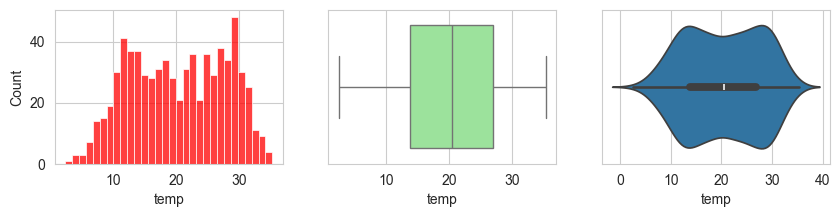

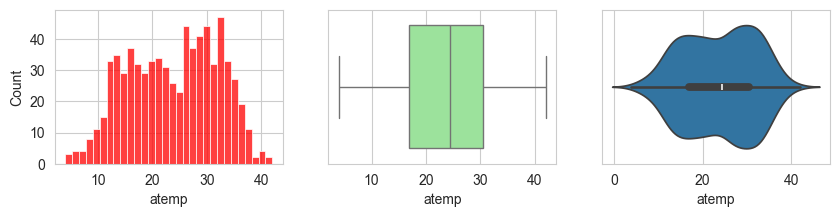

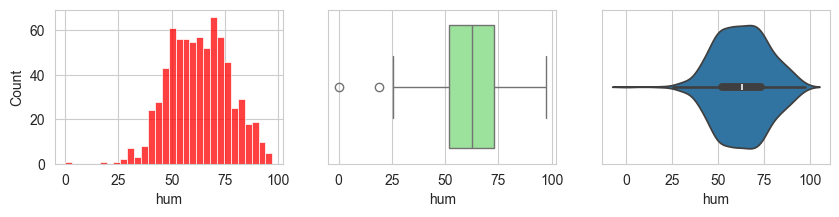

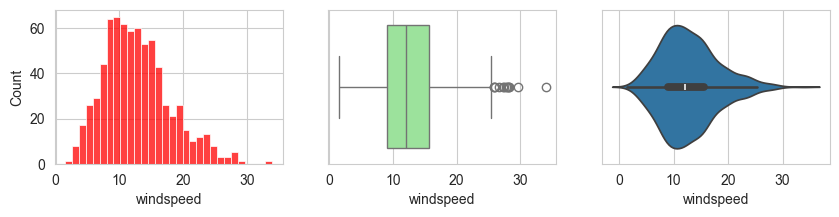

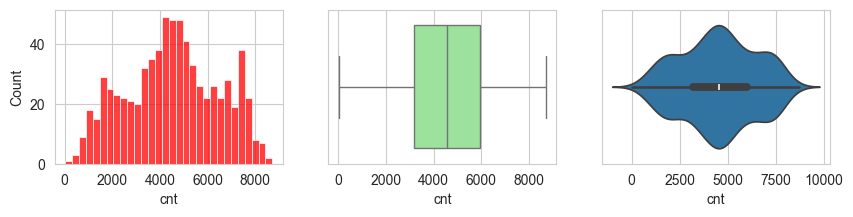

In [42]:
sns.set_style('whitegrid')

for column in NUMERICAL_COLUMNS + ['cnt']:
    fig, axs = plt.subplots(ncols = 3, figsize=(10, 2))
    sns.histplot(df_data, x=column, kde = False, color ='red', bins = 30, ax=axs[0])
    sns.boxplot(df_data, x=column, color ='lightgreen', ax=axs[1])
    sns.violinplot(data=df_data, x=column, ax=axs[2])

### Univariate Analysis: Categorical Variables

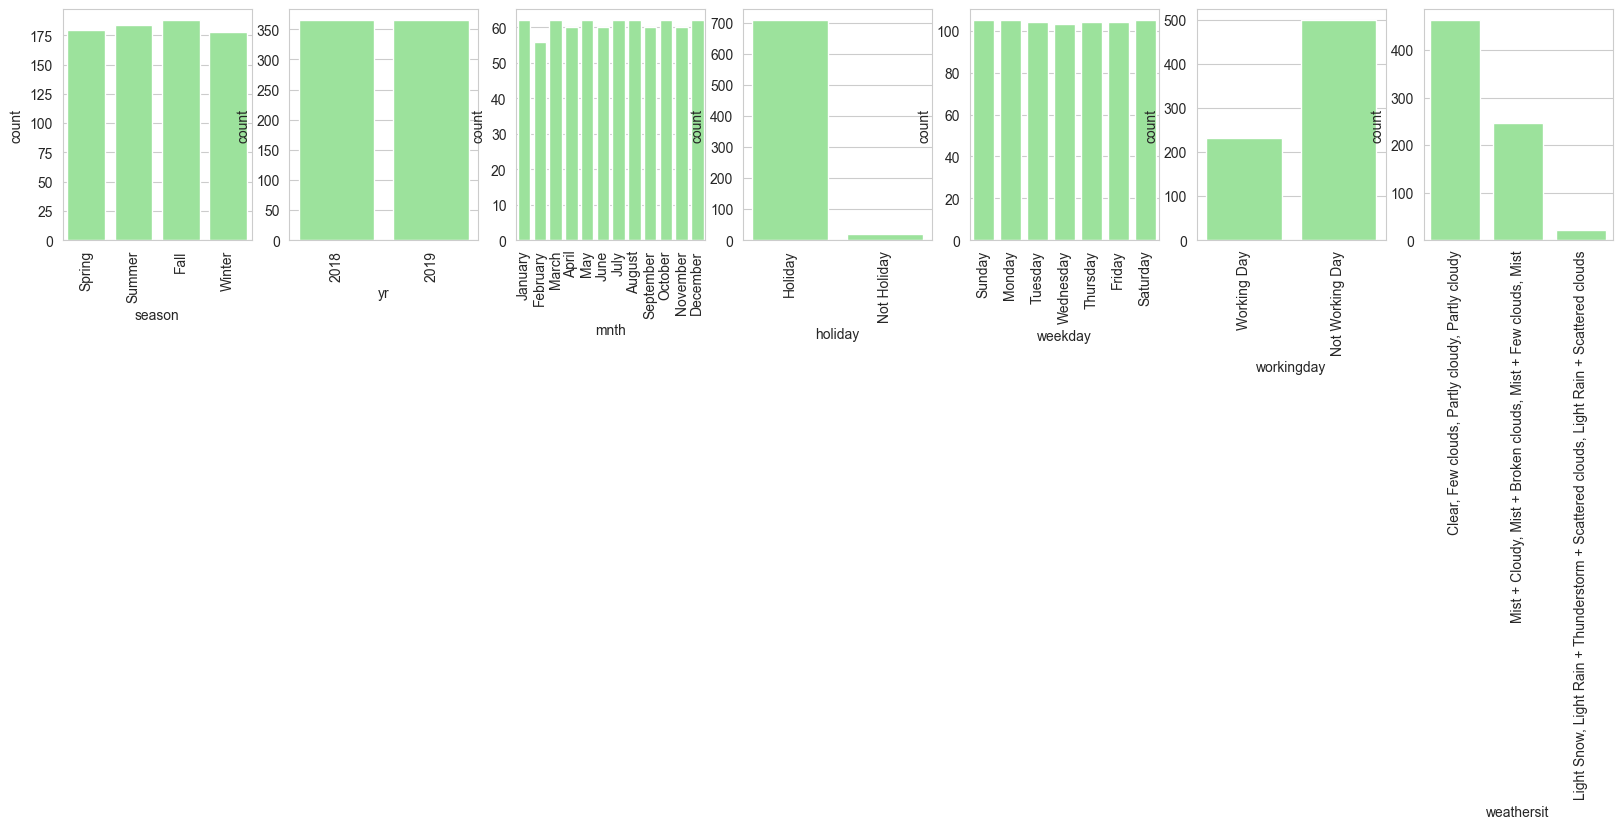

In [43]:
import warnings
warnings.filterwarnings("ignore")

fig, axs = plt.subplots(ncols = 7, figsize=(20, 3))
for i, column in enumerate(CATEGORICAL_COLUMNS):
    g = sns.countplot(df_data, x=column, color='lightgreen', ax=axs[i])
    g.set_xticklabels(labels=category_variable_name_dict[column].values(), rotation=90) 

### Bivariate Analysis

![Bivariate Analysis](https://miro.medium.com/v2/resize:fit:845/1*P10xcq7lK2VPp0ENwf6ttw.png "Bivariate Analysis")

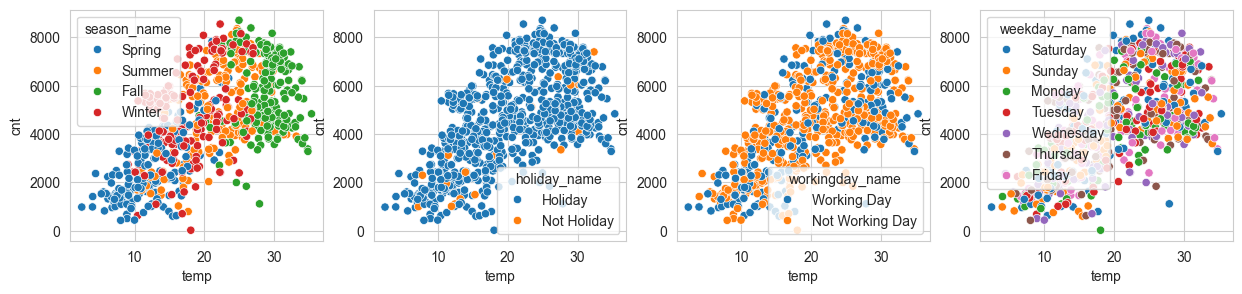

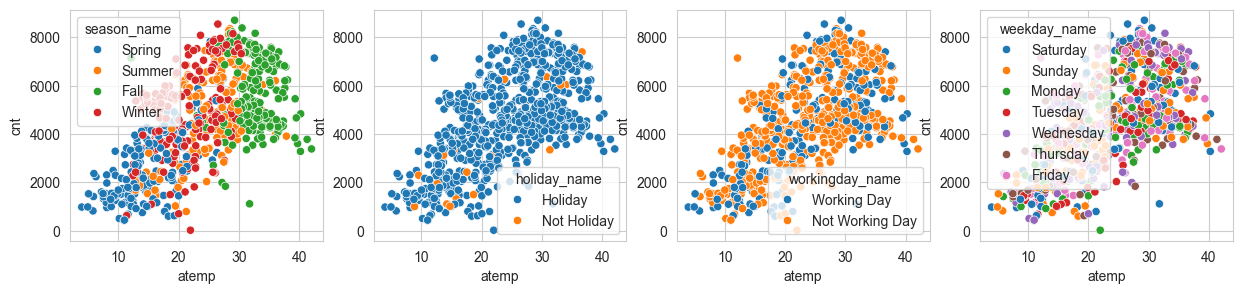

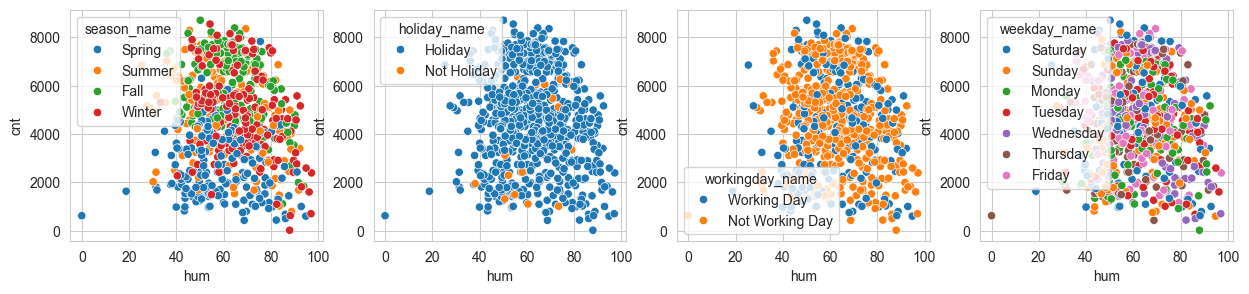

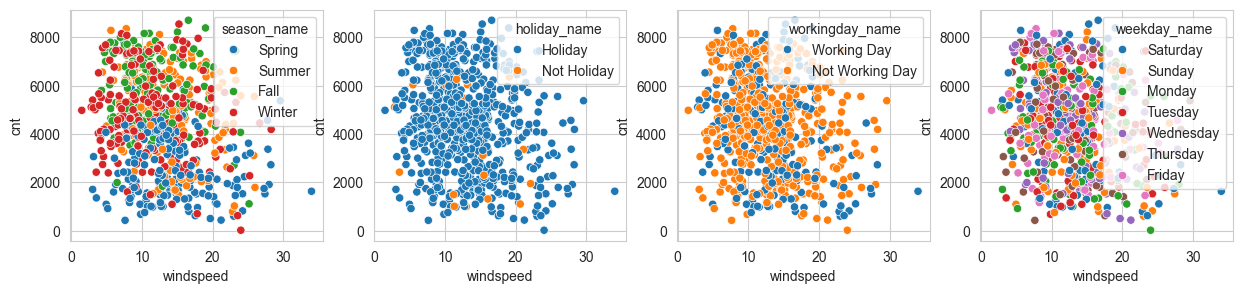

In [44]:
for i, column in enumerate(NUMERICAL_COLUMNS):
    fig, axs = plt.subplots(ncols=4, figsize=(15, 3))
    sns.scatterplot(df_data, x=column, y='cnt',  hue="season_name",  ax=axs[0])
    sns.scatterplot(df_data, x=column, y='cnt',  hue="holiday_name",  ax=axs[1])
    sns.scatterplot(df_data, x=column, y='cnt',  hue="workingday_name",  ax=axs[2])
    sns.scatterplot(df_data, x=column, y='cnt',  hue="weekday_name",  ax=axs[3]) 

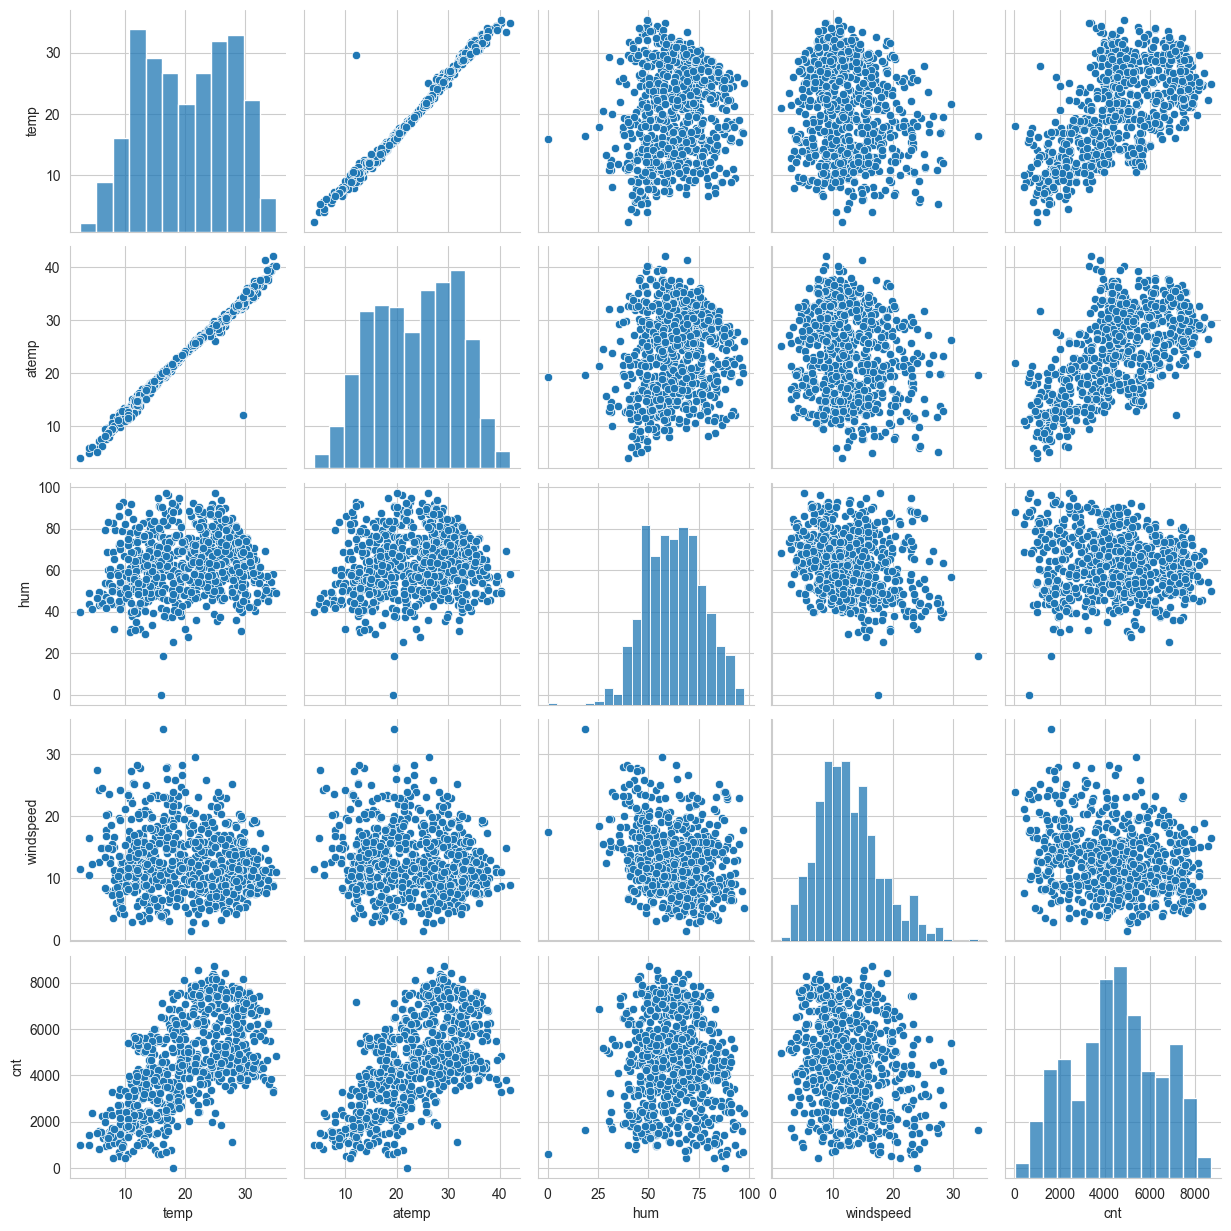

In [45]:
sns.pairplot(df_data, vars=['temp','atemp','hum','windspeed', 'cnt'])

<Axes: >

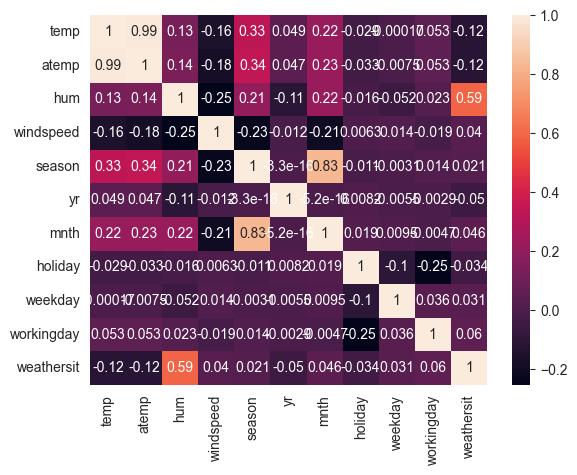

In [46]:
sns.heatmap(df_data[NUMERICAL_COLUMNS + CATEGORICAL_COLUMNS].corr(), annot=True)

#### Data Pre-processing

#### Handling Categorical Variables

_Dummy Encoding Vs. One hot encoding_:  One hot encoding utilises N binary variables for N categories in a variable. Dummy encoding uses N-1 features to represent N labels/categories.

Linear regressions behave badly when an n-dimensional input doesn't actually range freely across all n dimensions.

In [60]:
df_data['dteday'] = pd.to_datetime(df_data['dteday'], format='%m-%d-%Y', errors='coerce')
df_data['day_of_year'] = df_data['dteday'].dt.dayofyear

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['day_of_year', 'yr', 'mnth', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed']),
         ('cat', categorical_transformer, ['season', 'weekday', 'weathersit'])])


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearRegression())])

clf[:-1].fit(df_data)
clf[:-1].get_feature_names_out()

y = df_data['cnt']
X = df_data.drop('cnt', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))
clf[:-1].get_feature_names_out()

model score: 0.832


array(['num__day_of_year', 'num__yr', 'num__mnth', 'num__holiday',
       'num__workingday', 'num__temp', 'num__atemp', 'num__hum',
       'num__windspeed', 'cat__season_1', 'cat__season_2',
       'cat__season_3', 'cat__season_4', 'cat__weekday_0',
       'cat__weekday_1', 'cat__weekday_2', 'cat__weekday_3',
       'cat__weekday_4', 'cat__weekday_5', 'cat__weekday_6',
       'cat__weathersit_1', 'cat__weathersit_2', 'cat__weathersit_3'],
      dtype=object)

In [ ]:
df_data['dteday']

instant
1      01-01-2018
2      02-01-2018
3      03-01-2018
4      04-01-2018
5      05-01-2018
          ...    
726    27-12-2019
727    28-12-2019
728    29-12-2019
729    30-12-2019
730    31-12-2019
Name: dteday, Length: 730, dtype: object